In [2]:
import numpy as np

a = np.array([1, 2, 3, 4])

In [3]:
a

array([1, 2, 3, 4])

In [4]:
np.mean(a)

2.5

In [5]:
%%timeit

big = list(range(10000))  # setup line, not timed
sum(big)  # timed

137 µs ± 22 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<Figure size 640x480 with 0 Axes>

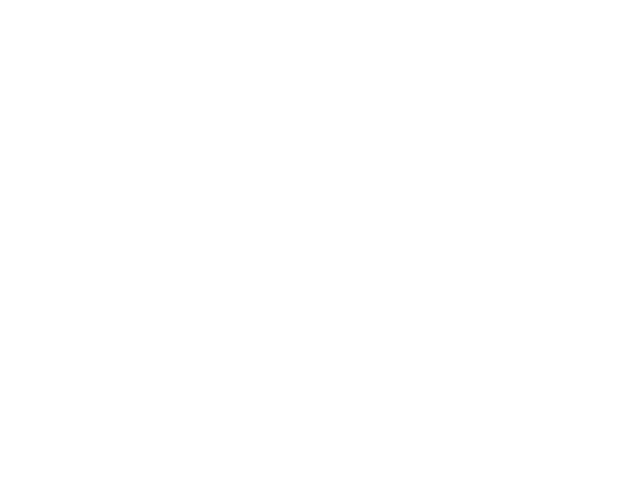

In [11]:
import matplotlib.pyplot as plt 
%matplotlib widget

plt.figure()

In [12]:
plt.gcf()

<Figure size 640x480 with 0 Axes>

In [14]:
!supervisor/start_supervisor.sh status

/bin/bash: supervisor/start_supervisor.sh: No such file or directory


In [1]:
from bluesky import RunEngine 
from bluesky.plans import count
help(count)
RE = RunEngine({})

Help on function count in module bluesky.plans:

count(detectors, num=1, delay=None, *, per_shot=None, md=None)
    Take one or more readings from detectors.
    
    Parameters
    ----------
    detectors : list
        list of 'readable' objects
    num : integer, optional
        number of readings to take; default is 1
    
        If None, capture data until canceled
    delay : iterable or scalar, optional
        Time delay in seconds between successive readings; default is 0.
    per_shot : callable, optional
        hook for customizing action of inner loop (messages per step)
        Expected signature ::
    
           def f(detectors: Iterable[OphydObj]) -> Generator[Msg]:
               ...
    
    md : dict, optional
        metadata
    
    Notes
    -----
    If ``delay`` is an iterable, it must have at least ``num - 1`` entries or
    the plan will raise a ``ValueError`` during iteration.



In [2]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

0



Transient Scan ID: 1     Time: 2024-02-29 16:25:25
Persistent Unique Scan ID: '5db23880-d052-431f-9d4a-201fd2e44521'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 16:25:25.3 |     -3.000 |      0.011 |
|         2 | 16:25:25.3 |     -2.600 |      0.034 |
|         3 | 16:25:25.4 |     -2.200 |      0.089 |
|         4 | 16:25:25.4 |     -1.800 |      0.198 |
|         5 | 16:25:25.5 |     -1.400 |      0.375 |
|         6 | 16:25:25.5 |     -1.000 |      0.607 |
|         7 | 16:25:25.6 |     -0.600 |      0.835 |
|         8 | 16:25:25.6 |     -0.200 |      0.980 |
|         9 | 16:25:25.7 |      0.200 |      0.980 |
|        10 | 16:25:25.7 |      0.600 |      0.835 |
|        11 | 16:25:25.8 |      1.000 |      0.607 |
|        12 | 16:25:25.8 |      1.400 |      0.375 |
|        13 | 16:25:25.8 |      1.800 |      0.198 |
|        14

('5db23880-d052-431f-9d4a-201fd2e44521',)

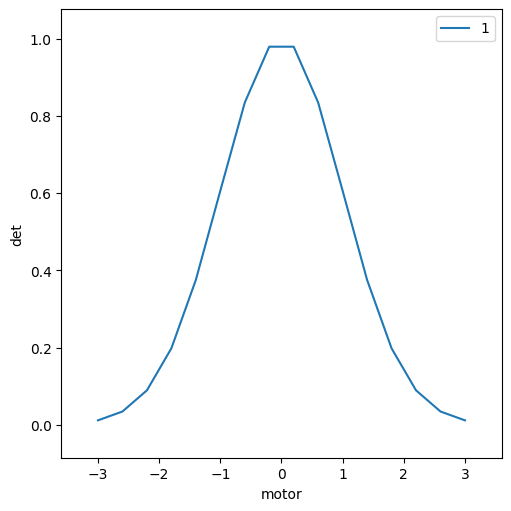

In [4]:
from bluesky.plans import scan
from ophyd.sim import det, motor  # simulated detector, motor

# Scan 'motor' from -3 to 3 in 10 steps, taking readings from 'det'.
RE(scan([det], motor, -3, 3, 16), purpose='calibration',
   sample='kryptonite')

In [6]:
from databroker import Broker

db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

In [7]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

In [8]:
from ophyd.sim import det1, det2  # two simulated detectors

In [9]:
from bluesky.plans import count
dets = [det1, det2]   # a list of any number of detectors

RE(count(dets))



Transient Scan ID: 2     Time: 2024-02-29 16:40:30
Persistent Unique Scan ID: '2c26809e-766d-4af9-b27d-19498dc457f4'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det1 |       det2 |
+-----------+------------+------------+------------+
|         1 | 16:40:30.1 |      5.000 |      1.765 |
+-----------+------------+------------+------------+
generator count ['2c26809e'] (scan num: 2)





('2c26809e-766d-4af9-b27d-19498dc457f4',)



Transient Scan ID: 3     Time: 2024-02-29 16:43:48
Persistent Unique Scan ID: '3f22ab9e-8682-4d87-a7e9-d81b449e754c'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |       det4 |
+-----------+------------+------------+------------+------------+
|         1 | 16:43:48.1 |     -1.500 |     -0.100 |      0.323 |
|         2 | 16:43:48.2 |     -1.200 |     -0.080 |      0.485 |
|         3 | 16:43:48.2 |     -0.900 |     -0.060 |      0.666 |
|         4 | 16:43:48.3 |     -0.600 |     -0.040 |      0.835 |
|         5 | 16:43:48.3 |     -0.300 |     -0.020 |      0.956 |
|         6 | 16:43:48.4 |      0.000 |      0.000 |      1.000 |
|         7 | 16:43:48.4 |      0.300 |      0.020 |      0.956 |
|         8 | 16:43:48.5 |      0.600 |      0.040 |      0.835 |
|         9 | 16:43:48.5 |      0.900 |      0.060 |      0.666 |
|        10 | 16:43:48.6 |      1.200 |      0.080 |      0.485 |
|

('3f22ab9e-8682-4d87-a7e9-d81b449e754c',)

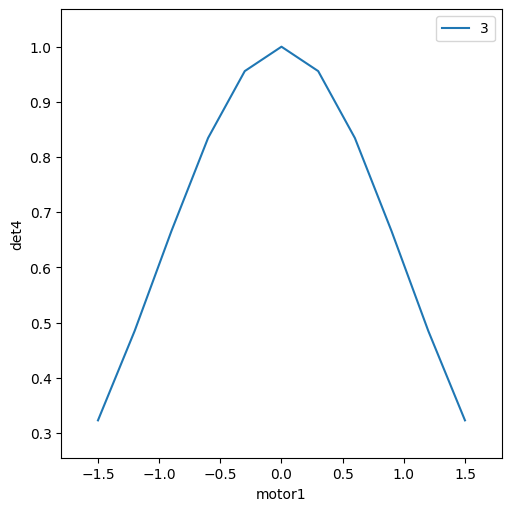

In [11]:
from ophyd.sim import det4, motor1, motor2
dets = [det4] 
RE(scan(dets,
        motor1, -1.5, 1.5,  # scan motor1 from -1.5 to 1.5
        motor2, -0.1, 0.1,  # ...while scanning motor2 from -0.1 to 0.1
        11))  # ...both in 11 steps